In [1]:
from ipynb.fs.full.TARGET_Analysis_Functions import *
from matplotlib import pyplot
from scipy.stats import pearsonr

# Comparing EFS based on MDM2 expression

Low expression: median EFS = 632.0, mean EFS = 1665.6031746031747, 95% CI = (1263.4047235871735, 2067.801625619176)
High expression: median EFS = 885.0, mean EFS = 1518.357142857143, 95% CI = (1190.0583125826574, 1846.6559731316283)
Ttest_indResult(statistic=0.5602916857650784, pvalue=0.5762374255294833)


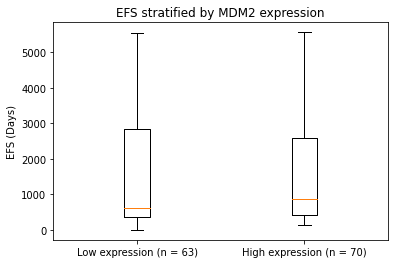

In [36]:
#Split up data into low and high MDM2 expression groups, using z-scores of -0.5 and 0.5 as cutoffs, respectively
MDM2_groups = stratifyDataOnGeneExpression('MDM2',-0.5,0.5)
compareEFS(MDM2_groups, 'EFS stratified by MDM2 expression', 'Low expression', 'High expression')




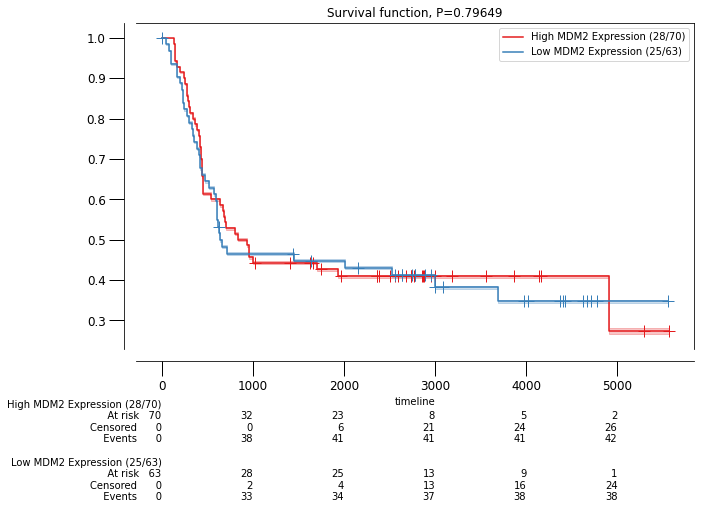

In [37]:
kaplanmeierEFS(MDM2_groups,'Low MDM2 Expression', 'High MDM2 Expression')




# Compare EFS based on both MDM2 and ACE2 expression

### Comparing EFS in high MDM2 samples based on ACE2 expression

In [38]:
#Find z-scores for high MDM2 samples
high_MDM2_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MDM2_groups[1]).intersection(z_scores.columns))
high_MDM2_z_scores = z_scores[high_MDM2_columns]

#Obtain the ACE2 z-scores in high MDM2 samples
high_MDM2_ACE2_z_scores = high_MDM2_z_scores.loc[high_MDM2_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
high_MDM2_low_ACE2_samples = high_MDM2_ACE2_z_scores.loc[high_MDM2_ACE2_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_MDM2_high_ACE2_samples = high_MDM2_ACE2_z_scores.loc[high_MDM2_ACE2_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 1710.0, mean EFS = 1841.7407407407406, 95% CI = (1252.082884763072, 2431.3985967184094)
High expression: median EFS = 1002.0, mean EFS = 1513.2941176470588, 95% CI = (862.1149683337352, 2164.4732669603823)
Ttest_indResult(statistic=0.7107490822772864, pvalue=0.4811682273388901)


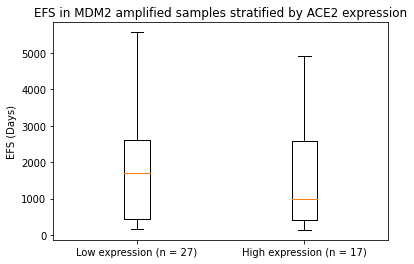

In [39]:
compareEFS([high_MDM2_low_ACE2_samples,high_MDM2_high_ACE2_samples], 'EFS in MDM2 amplified samples stratified by ACE2 expression', 'Low expression', 'High expression')





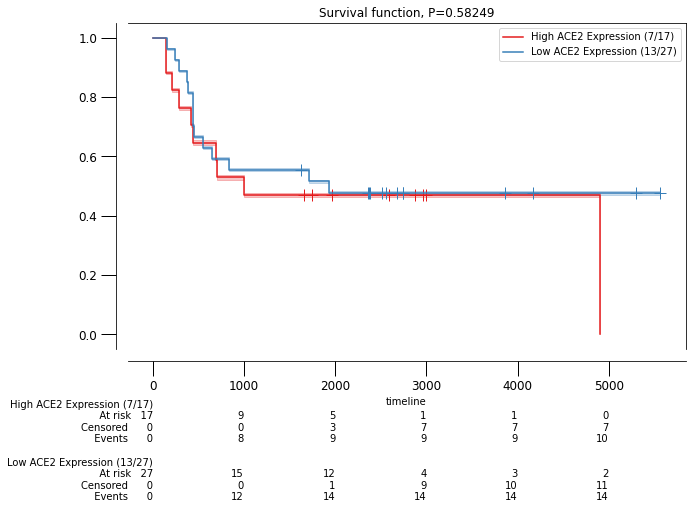

In [40]:
kaplanmeierEFS([high_MDM2_low_ACE2_samples,high_MDM2_high_ACE2_samples],'Low ACE2 Expression', 'High ACE2 Expression')




### Comparing EFS in low MDM2 samples stratified by ACE2 expression

In [41]:
#Find z-scores for high MDM2 samples
low_MDM2_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MDM2_groups[0]).intersection(z_scores.columns))
low_MDM2_z_scores = z_scores[low_MDM2_columns]

#Obtain the ACE2 z-scores in high MDM2 samples
low_MDM2_ACE2_z_scores = low_MDM2_z_scores.loc[low_MDM2_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_MDM2_low_ACE2_samples = low_MDM2_ACE2_z_scores.loc[low_MDM2_ACE2_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
low_MDM2_high_ACE2_samples = low_MDM2_ACE2_z_scores.loc[low_MDM2_ACE2_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 1031.5, mean EFS = 1641.0, 95% CI = (572.2540059054415, 2709.7459940945582)
High expression: median EFS = 646.0, mean EFS = 1575.896551724138, 95% CI = (1050.8335719041852, 2100.9595315440906)
Ttest_indResult(statistic=0.11710383468504398, pvalue=0.9074111364981327)


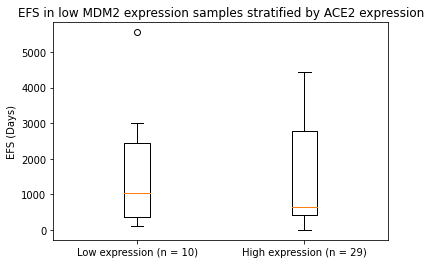

In [42]:
compareEFS([low_MDM2_low_ACE2_samples,low_MDM2_high_ACE2_samples], 'EFS in low MDM2 expression samples stratified by ACE2 expression', 'Low expression', 'High expression')





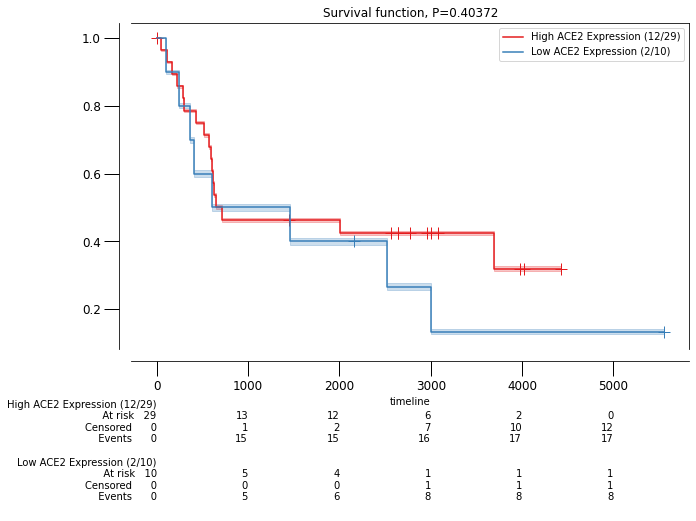

In [43]:
kaplanmeierEFS([low_MDM2_low_ACE2_samples,low_MDM2_high_ACE2_samples],'Low ACE2 Expression', 'High ACE2 Expression')




### Compare EFS between High MDM2, Low ACE2 vs Low MDM2, High ACE2

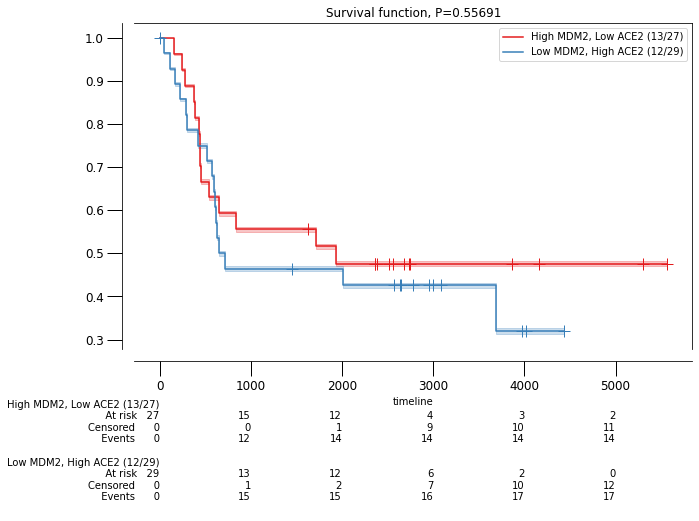

In [44]:
kaplanmeierEFS([low_MDM2_high_ACE2_samples,high_MDM2_low_ACE2_samples],'Low MDM2, High ACE2', 'High MDM2, Low ACE2')




# Relationship between ACE2 and MDM2 Expression

In [205]:
ACE2_z_scores = z_scores.loc[z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
MDM2_z_scores = z_scores.loc[z_scores['Hugo_Symbol']=='MDM2'].iloc[:,2:].transpose()




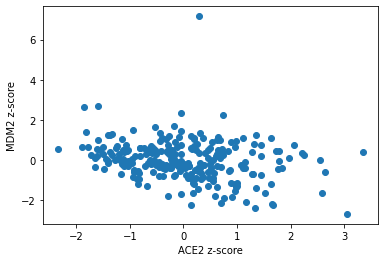

In [206]:
pyplot.scatter(ACE2_z_scores,MDM2_z_scores)
plt.xlabel('ACE2 z-score')
plt.ylabel('MDM2 z-score')
plt.show()




In [207]:
corr,_ = pearsonr(ACE2_z_scores.iloc[:,0].tolist(),MDM2_z_scores.iloc[:,0].tolist())
print(corr)



-0.2592271385033838
